<a href="https://colab.research.google.com/github/Anyaaa-2/myprojects/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
#importing dataset
dataset = pd.read_csv('loanpred.csv')
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#to check number of rows and columns
dataset.shape

(614, 13)

In [ ]:
dataset.info() #gives info abt dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#gives an overview of the data's distribution and central tendencies
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# used to create a cross-tabulation between two categorical variables
# to see how credit history affects loan status
pd.crosstab(dataset['Credit_History'],dataset['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<Axes: >

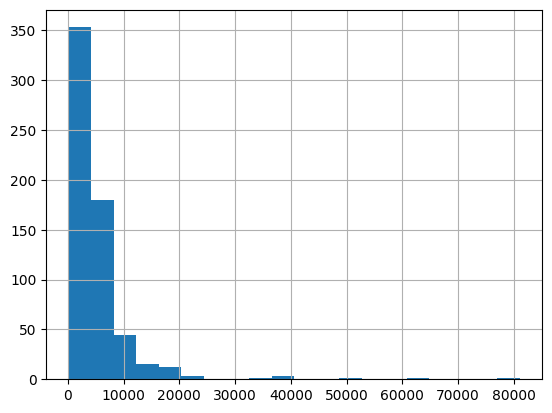

In [ ]:
#right skewed/positively skewed histogram
#bins set to 20, so the data will be divided into 20 equal-width intervals,

dataset['ApplicantIncome'].hist(bins=20)

<Axes: >

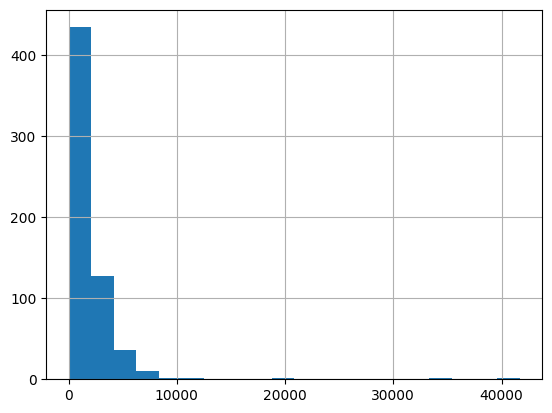

In [ ]:
dataset['CoapplicantIncome'].hist(bins=20)

<Axes: >

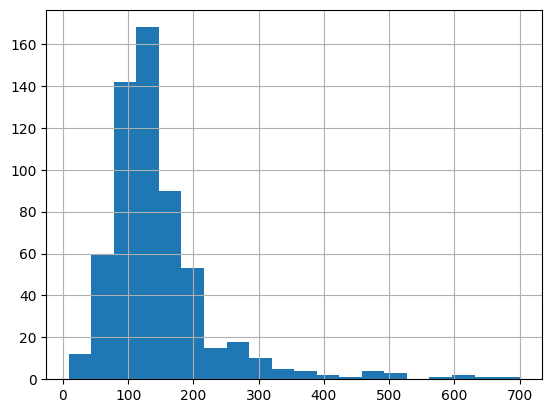

In [ ]:
dataset['LoanAmount'].hist(bins=20)

<Axes: >

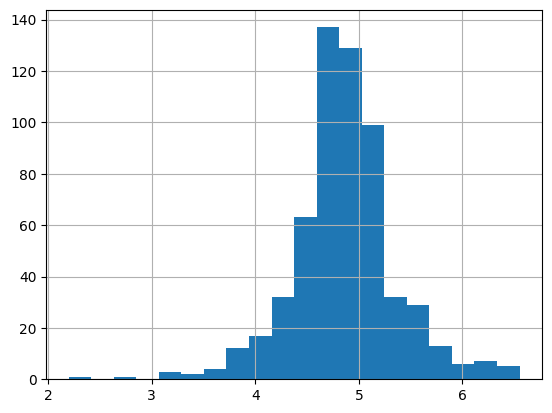

In [ ]:
#np.log is applied to features or target variables to change their distribution , used while dealing with skewed data
# used to normalise the data
dataset['LoanAmount_log']=np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)

<Axes: >

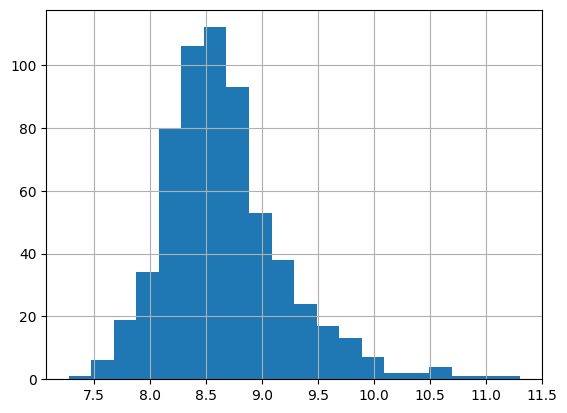

In [ ]:
# to normalise applicant income and coapplicant income together by taking sum
dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
dataset['TotalIncome_log'] = np.log(dataset['TotalIncome'])
dataset['TotalIncome_log'].hist(bins=20)

In [ ]:
# to find how many missing values are there in each variable
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [ ]:
# to fill missing values
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)      #mode because its a categorical variable
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)    #inplace is used to replace missing values with mode
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)
dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.mean())  #mean is used as it is not a categorical variable
dataset.LoanAmount_log = dataset.LoanAmount_log.fillna(dataset.LoanAmount_log.mean())
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [ ]:
#dividing dataset into dependent and independent variables
#np.r_[1:5, 9:11, 13:15] creates a NumPy array that contains the column indices you want to select

X = dataset.iloc[:,np.r_[1:5,9:11,13:15]].values #independent variables
y = dataset.iloc[:,12].values  #dependent variables/target variable(loan status)


In [ ]:
#splitting dataset into train and test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

#random state is set to 0 to ensure that the split is the same every time you run the code

In [ ]:
# to convert categorical text to numerical values for the system to understand

from sklearn.preprocessing import LabelEncoder
le_x = LabelEncoder()

#to apply it to each of the index that needs to be converted
#for train set
for i in range(0,5):
  X_train[:,i] = le_x.fit_transform(X_train[:,i])

X_train[:,7] = le_x.fit_transform(X_train[:,7])

X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [ ]:
le_y = LabelEncoder()
y_train = le_y.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [ ]:
#for test set
for i in range(0,5):
  X_test[:,i] = le_x.fit_transform(X_test[:,i])

X_test[:,7] = le_x.fit_transform(X_test[:,7])

y_test = le_y.fit_transform(y_test)

In [ ]:
# Scaling brings all features to a standard scale, typically between 0 and 1 making prediction easier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
#DECISION TREE ALGORITHM
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#predicting values for test data
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
#finding accuracy
from sklearn import metrics
print("the accuracy of decision tree is:", metrics.accuracy_score(y_pred,y_test))

the accuracy of decision tree is: 0.5934959349593496


In [ ]:
#NAIVE BAYES ALGORITHM
from sklearn.naive_bayes import GaussianNB
Nbclassifier = GaussianNB()
Nbclassifier.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = Nbclassifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
metrics.accuracy_score(y_pred,y_test)

0.8292682926829268

In [ ]:
#RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 45, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=45, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
metrics.accuracy_score(y_pred,y_test)

0.7479674796747967

In [ ]:
# Test dataset (to predict loan status)
testdataset = pd.read_csv("test.csv")
testdataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001243,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban
1,LP001045,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural
2,LP001035,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban
3,LP001025,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban
4,LP001975,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban


In [ ]:
dataset.shape

(614, 16)

In [ ]:
testdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            113 non-null    object 
 1   Gender             112 non-null    object 
 2   Married            112 non-null    object 
 3   Dependents         111 non-null    object 
 4   Education          113 non-null    object 
 5   Self_Employed      105 non-null    object 
 6   ApplicantIncome    113 non-null    int64  
 7   CoapplicantIncome  113 non-null    int64  
 8   LoanAmount         106 non-null    float64
 9   Loan_Amount_Term   107 non-null    float64
 10  Credit_History     105 non-null    float64
 11  Property_Area      113 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 10.7+ KB


In [ ]:
testdataset.isnull().sum()

Loan_ID              0
Gender               1
Married              1
Dependents           2
Education            0
Self_Employed        8
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           7
Loan_Amount_Term     6
Credit_History       8
Property_Area        0
dtype: int64

In [ ]:
testdataset['Gender'].fillna(testdataset['Gender'].mode()[0],inplace=True)      #mode because its a categorical variable
testdataset['Married'].fillna(testdataset['Married'].mode()[0],inplace=True)    #inplace is used to replace missing values with mode
testdataset['Dependents'].fillna(testdataset['Dependents'].mode()[0],inplace=True)
testdataset['Self_Employed'].fillna(testdataset['Self_Employed'].mode()[0],inplace=True)
testdataset.LoanAmount = testdataset.LoanAmount.fillna(testdataset.LoanAmount.mean())  #mean is used as it is not a categorical variable
testdataset['Loan_Amount_Term'].fillna(testdataset['Loan_Amount_Term'].mode()[0],inplace=True)
testdataset['Credit_History'].fillna(testdataset['Credit_History'].mode()[0],inplace=True)
testdataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
testdataset['TotalIncome'] = testdataset['ApplicantIncome'] + testdataset['CoapplicantIncome']
testdataset['TotalIncome_log'] = np.log(testdataset['TotalIncome'])
#testdataset['TotalIncome_log'].hist(bins=20)

In [ ]:
testdataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,TotalIncome_log
0,LP001243,Male,No,0,Graduate,No,5849,0,135.632075,360.0,1.0,Urban,5849,8.674026
1,LP001045,Male,Yes,1,Graduate,No,4583,1508,128.000000,360.0,1.0,Rural,6091,8.714568
2,LP001035,Male,Yes,0,Graduate,Yes,3000,0,66.000000,360.0,1.0,Urban,3000,8.006368
3,LP001025,Male,Yes,0,Not Graduate,No,2583,2358,120.000000,360.0,1.0,Urban,4941,8.505323
4,LP001975,Male,No,0,Graduate,No,6000,0,141.000000,360.0,1.0,Urban,6000,8.699515


In [ ]:
test = dataset.iloc[:,np.r_[1:5,9:11,13:15]].values
for i in range(0,5):
  test[:,i] = le_x.fit_transform(test[:,i])

test[:,7] = le_x.fit_transform(test[:,7])

test

array([[1, 0, 0, ..., 1.0, 4.857444178729352, 320],
       [1, 1, 1, ..., 1.0, 4.852030263919617, 333],
       [1, 1, 0, ..., 1.0, 4.189654742026425, 42],
       ...,
       [1, 1, 1, ..., 1.0, 5.53338948872752, 436],
       [1, 1, 2, ..., 1.0, 5.231108616854587, 416],
       [0, 0, 0, ..., 0.0, 4.890349128221754, 185]], dtype=object)

In [ ]:
#feature scaling
test = sc.fit_transform(test)

In [ ]:
pred = Nbclassifier.predict(test)
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,